In [371]:
import numpy as np
import pandas as pd

In [372]:
##Importação dos dados de treino

In [373]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [374]:
##Remoção de colunas inteiramente preenchidas por NaN

In [375]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [376]:
##Introdução do cabeçalho do data frame

In [377]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [378]:
##Geração de Histogramas e seleção de variáveis

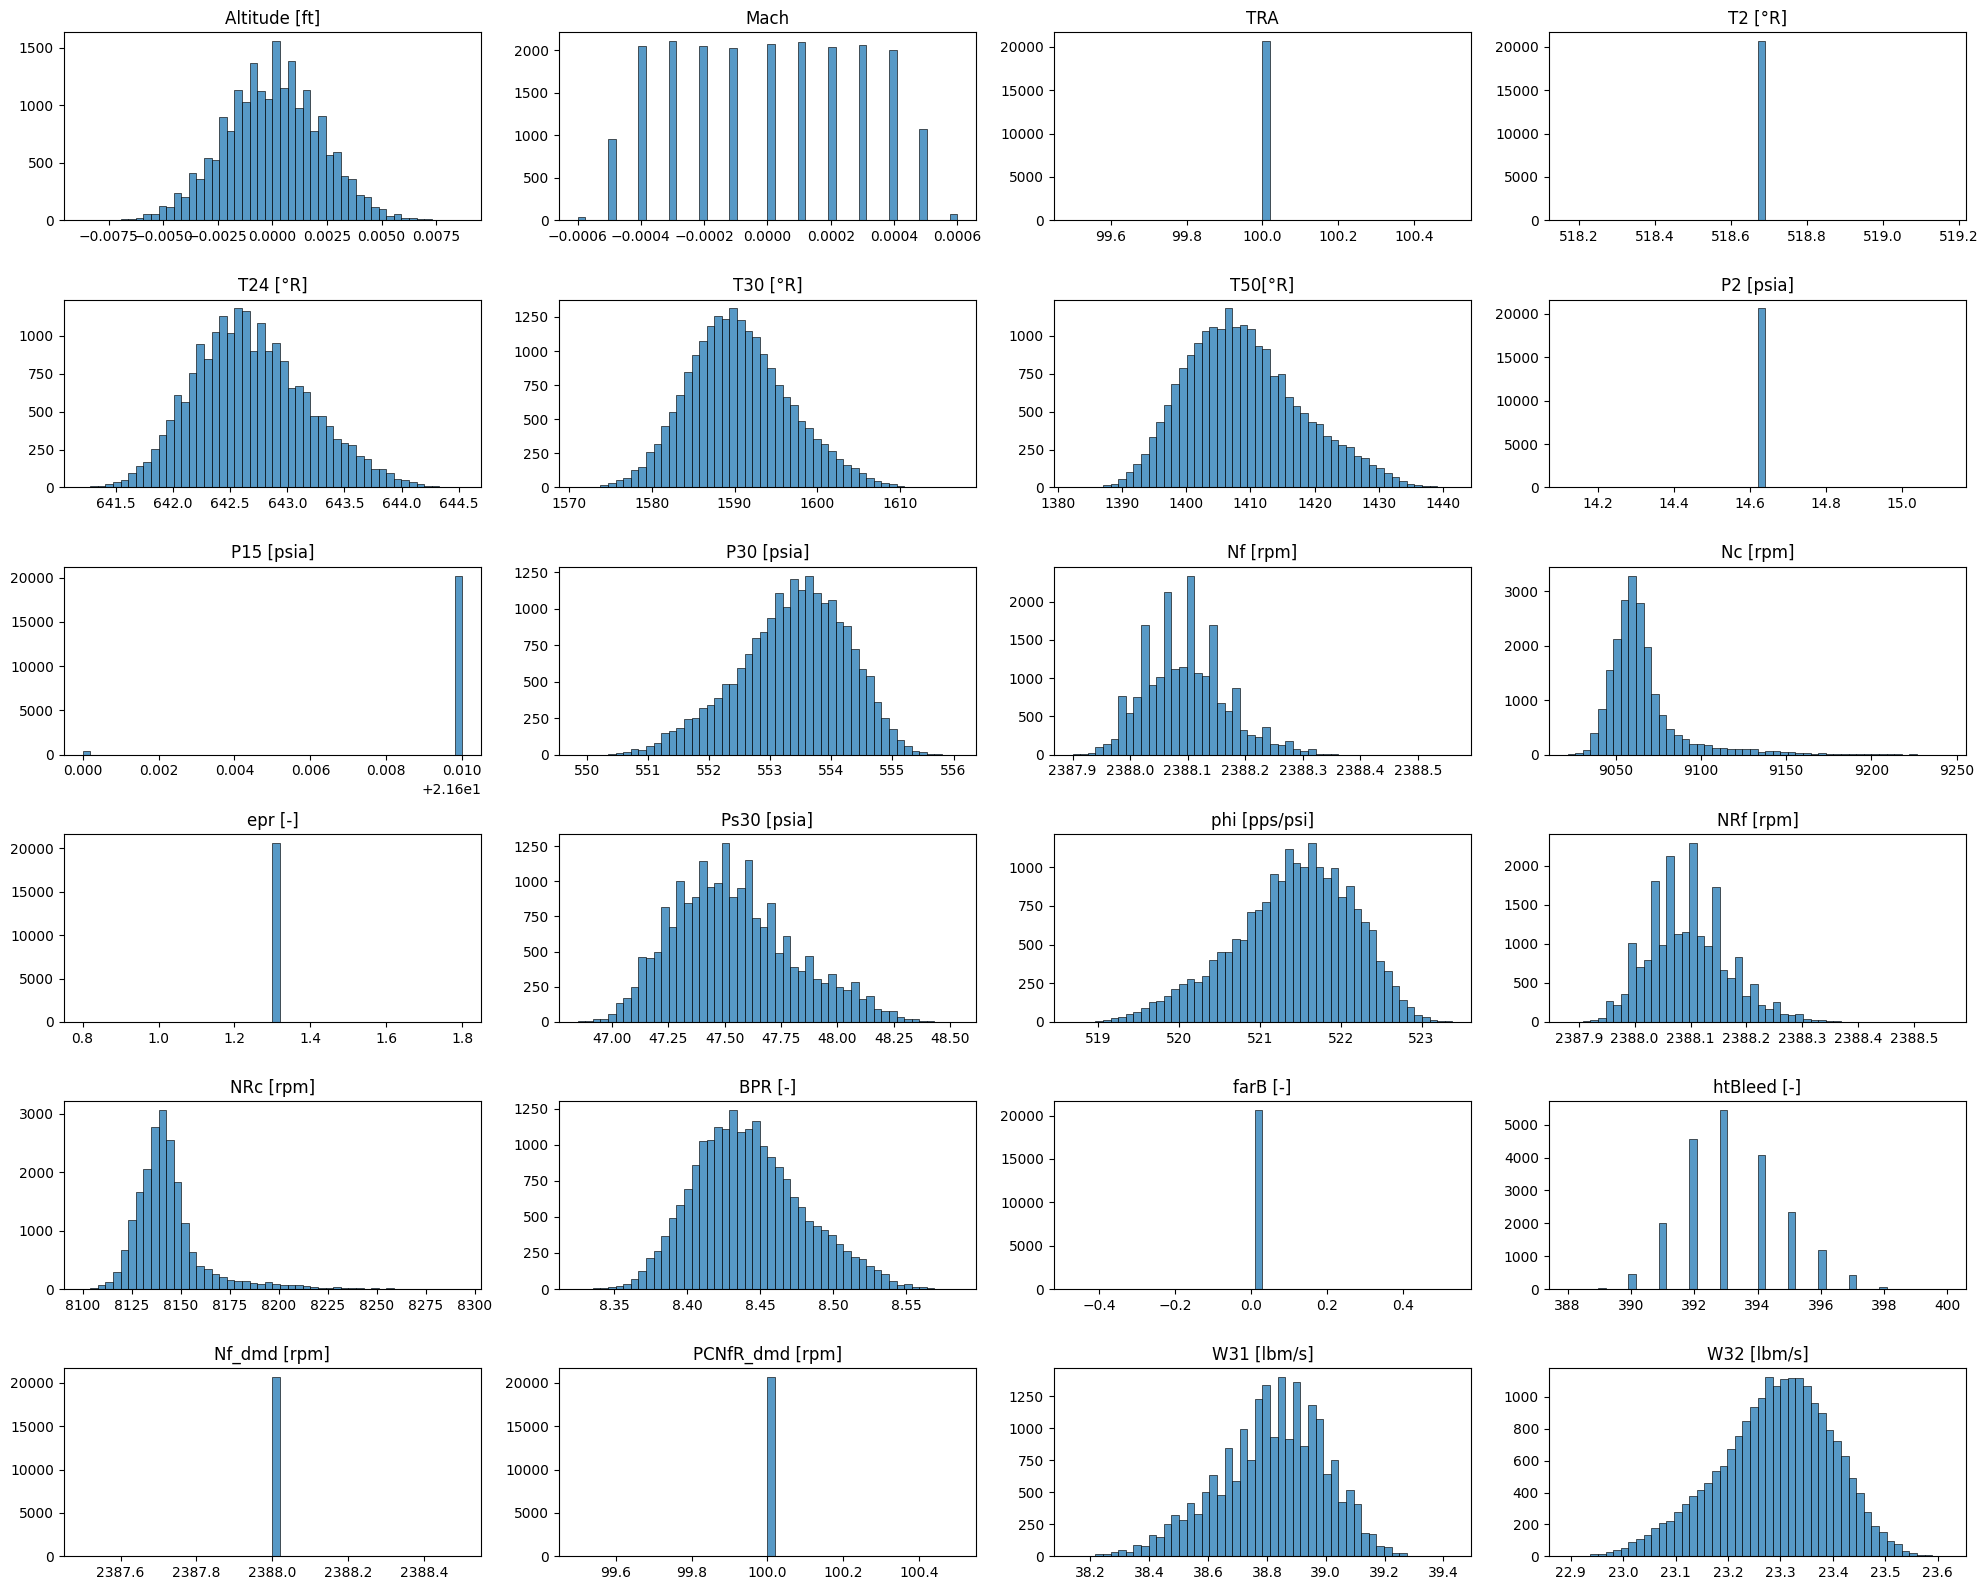

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [380]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [381]:
##Normalização

In [382]:
from sklearn.preprocessing import MinMaxScaler

In [383]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [384]:
##Definição dos targets para regressão e classificação nos dados de treino

In [385]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [386]:
##Visualização de um ciclo de vida de um motor

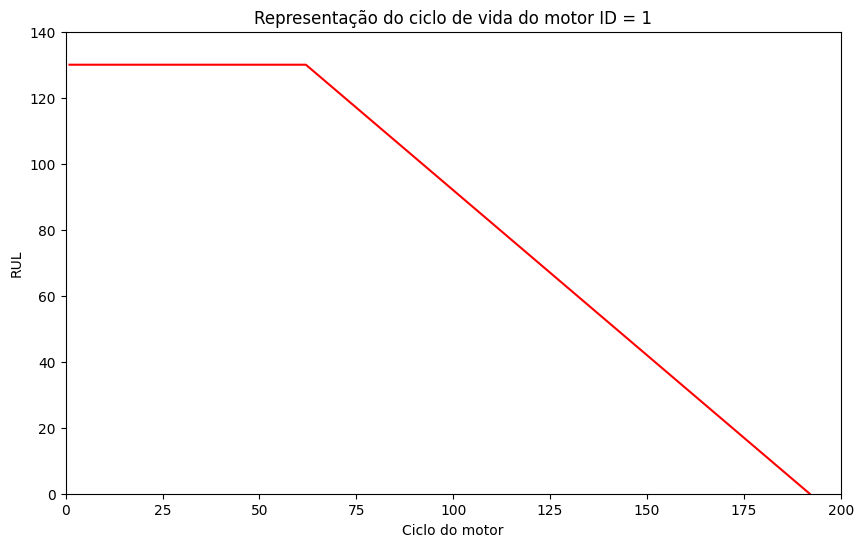

In [387]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [388]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [389]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [390]:
##Criação das janelas de tempo para dados de treino e de teste

In [391]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [392]:
##Separação das variáveis de treino e teste

In [393]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [394]:
##Criação do modelo LSTM

In [395]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [396]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 3976.0273 - mean_absolute_error: 51.9502 - mean_squared_error: 3976.0273

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - loss: 2283.9797 - mean_absolute_error: 39.0084 - mean_squared_error: 2283.9797 - val_loss: 688.3568 - val_mean_absolute_error: 21.9109 - val_mean_squared_error: 688.3569
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 871.2357 - mean_absolute_error: 23.7528 - mean_squared_error: 871.2357

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 810.5140 - mean_absolute_error: 22.6553 - mean_squared_error: 810.5140 - val_loss: 1012.8848 - val_mean_absolute_error: 25.1507 - val_mean_squared_error: 1012.8848
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 689.8995 - mean_absolute_error: 20.6017 - mean_squared_error: 689.8994

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 653.6646 - mean_absolute_error: 19.9601 - mean_squared_error: 653.6645 - val_loss: 434.3984 - val_mean_absolute_error: 16.3330 - val_mean_squared_error: 434.3984
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 520.5603 - mean_absolute_error: 17.7400 - mean_squared_error: 520.5604

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 505.5533 - mean_absolute_error: 17.4154 - mean_squared_error: 505.5533 - val_loss: 289.8835 - val_mean_absolute_error: 13.1321 - val_mean_squared_error: 289.8835
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 439.3737 - mean_absolute_error: 16.2066 - mean_squared_error: 439.3737

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 439.3545 - mean_absolute_error: 16.1941 - mean_squared_error: 439.3545 - val_loss: 614.5222 - val_mean_absolute_error: 19.5803 - val_mean_squared_error: 614.5222
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 406.4595 - mean_absolute_error: 15.6086 - mean_squared_error: 406.4595

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 393.2386 - mean_absolute_error: 15.2466 - mean_squared_error: 393.2386 - val_loss: 337.0962 - val_mean_absolute_error: 14.6506 - val_mean_squared_error: 337.0962
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 388.1897 - mean_absolute_error: 15.1477 - mean_squared_error: 388.1897

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 385.5938 - mean_absolute_error: 15.0427 - mean_squared_error: 385.5938 - val_loss: 298.6856 - val_mean_absolute_error: 13.4323 - val_mean_squared_error: 298.6856
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 353.6895 - mean_absolute_error: 14.3553 - mean_squared_error: 353.6895

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 359.2375 - mean_absolute_error: 14.4168 - mean_squared_error: 359.2375 - val_loss: 275.1820 - val_mean_absolute_error: 13.2629 - val_mean_squared_error: 275.1820
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 338.7205 - mean_absolute_error: 14.0505 - mean_squared_error: 338.7205

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 342.4497 - mean_absolute_error: 14.0698 - mean_squared_error: 342.4497 - val_loss: 275.5201 - val_mean_absolute_error: 12.9006 - val_mean_squared_error: 275.5201
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 338.9534 - mean_absolute_error: 13.9177 - mean_squared_error: 338.9534

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 335.0576 - mean_absolute_error: 13.8660 - mean_squared_error: 335.0576 - val_loss: 230.1942 - val_mean_absolute_error: 11.5529 - val_mean_squared_error: 230.1942
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 345.3560 - mean_absolute_error: 14.0841 - mean_squared_error: 345.3560

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - loss: 341.1295 - mean_absolute_error: 13.9687 - mean_squared_error: 341.1295 - val_loss: 236.2610 - val_mean_absolute_error: 11.2526 - val_mean_squared_error: 236.2610
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 306.9539 - mean_absolute_error: 13.2970 - mean_squared_error: 306.9539

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - loss: 317.4830 - mean_absolute_error: 13.4772 - mean_squared_error: 317.4830 - val_loss: 317.9603 - val_mean_absolute_error: 12.8061 - val_mean_squared_error: 317.9603
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 309.0604 - mean_absolute_error: 13.2128 - mean_squared_error: 309.0604

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - loss: 312.3207 - mean_absolute_error: 13.2991 - mean_squared_error: 312.3207 - val_loss: 251.0823 - val_mean_absolute_error: 12.2662 - val_mean_squared_error: 251.0823
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 300.6292 - mean_absolute_error: 13.0702 - mean_squared_error: 300.6292

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 304.1152 - mean_absolute_error: 13.0911 - mean_squared_error: 304.1152 - val_loss: 264.2723 - val_mean_absolute_error: 13.3224 - val_mean_squared_error: 264.2722
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 304.8953 - mean_absolute_error: 13.1861 - mean_squared_error: 304.8954

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 301.6765 - mean_absolute_error: 13.0764 - mean_squared_error: 301.6765 - val_loss: 222.6341 - val_mean_absolute_error: 11.2874 - val_mean_squared_error: 222.6341
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 285.7610 - mean_absolute_error: 12.7308 - mean_squared_error: 285.7610

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 292.6947 - mean_absolute_error: 12.8580 - mean_squared_error: 292.6947 - val_loss: 309.8352 - val_mean_absolute_error: 13.7010 - val_mean_squared_error: 309.8351
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 278.3575 - mean_absolute_error: 12.5739 - mean_squared_error: 278.3575

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 283.4955 - mean_absolute_error: 12.6303 - mean_squared_error: 283.4955 - val_loss: 279.2197 - val_mean_absolute_error: 11.7106 - val_mean_squared_error: 279.2197
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 292.8845 - mean_absolute_error: 12.8004 - mean_squared_error: 292.8845

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 292.6205 - mean_absolute_error: 12.7344 - mean_squared_error: 292.6205 - val_loss: 246.5584 - val_mean_absolute_error: 11.9427 - val_mean_squared_error: 246.5584
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 280.9973 - mean_absolute_error: 12.6990 - mean_squared_error: 280.9973

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 281.3683 - mean_absolute_error: 12.6090 - mean_squared_error: 281.3683 - val_loss: 243.3251 - val_mean_absolute_error: 12.2637 - val_mean_squared_error: 243.3251
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 279.8115 - mean_absolute_error: 12.5523 - mean_squared_error: 279.8115

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 281.0847 - mean_absolute_error: 12.5385 - mean_squared_error: 281.0847 - val_loss: 223.1942 - val_mean_absolute_error: 10.7102 - val_mean_squared_error: 223.1942


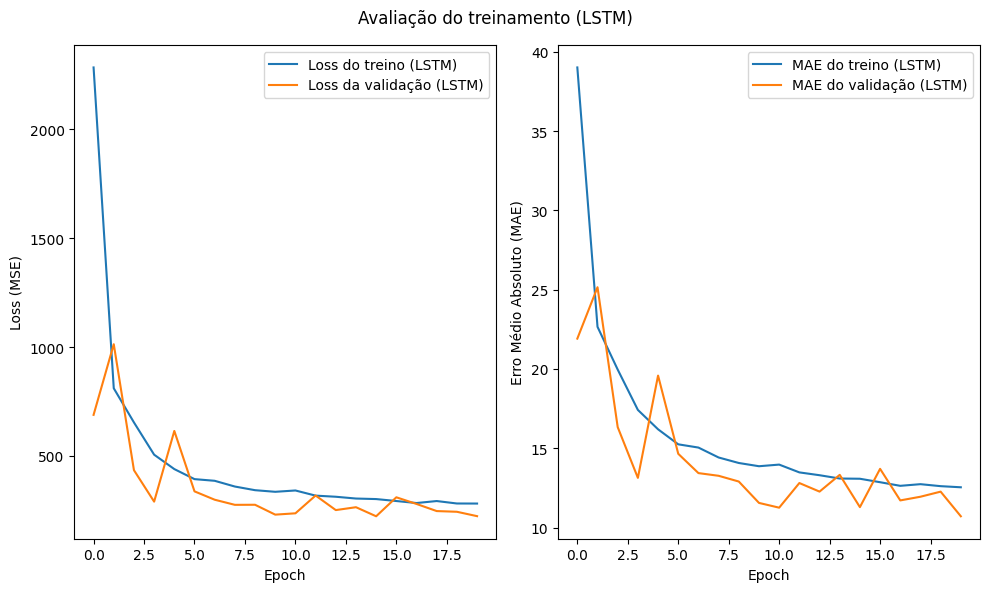

In [397]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [398]:
##Testando o modelo com os dados de teste 

In [399]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [400]:
##Avaliando o modelo

248.33460171757415
15.76
0.12213179695214964
11.263633210596359
0.7492419945540598
Tempo de 226.489842s


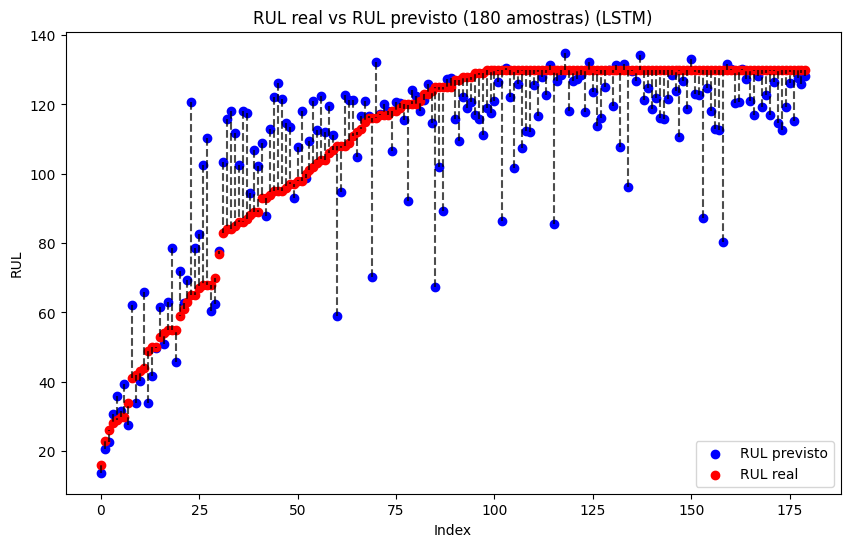

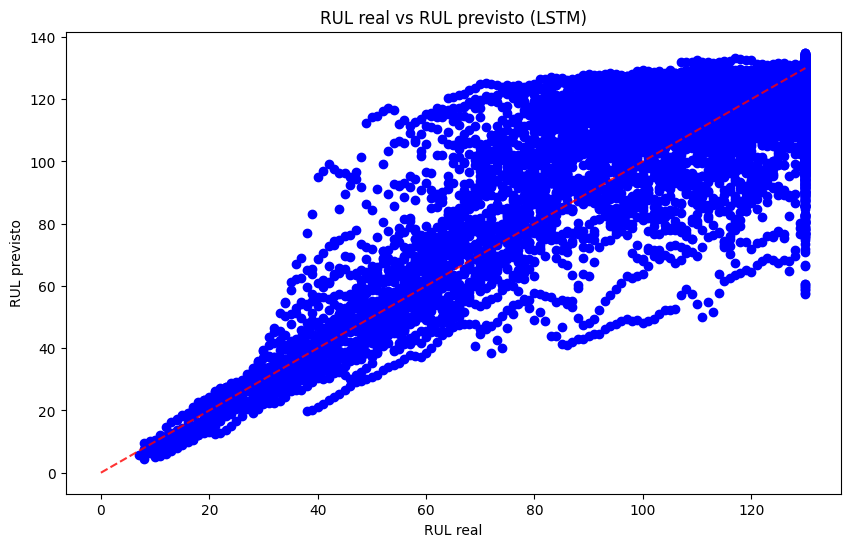

In [401]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [402]:
##Criando modelo BiLSTM

In [403]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [404]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5508.6680 - mean_absolute_error: 62.7486 - mean_squared_error: 5508.6680

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 3720.2112 - mean_absolute_error: 51.3591 - mean_squared_error: 3720.2112 - val_loss: 1900.9590 - val_mean_absolute_error: 38.8520 - val_mean_squared_error: 1900.9590
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1695.9420 - mean_absolute_error: 36.0289 - mean_squared_error: 1695.9420

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1349.4371 - mean_absolute_error: 31.3905 - mean_squared_error: 1349.4371 - val_loss: 772.1520 - val_mean_absolute_error: 22.7997 - val_mean_squared_error: 772.1520
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 805.4405 - mean_absolute_error: 22.8579 - mean_squared_error: 805.4405

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 769.2646 - mean_absolute_error: 22.2687 - mean_squared_error: 769.2646 - val_loss: 776.2404 - val_mean_absolute_error: 23.0489 - val_mean_squared_error: 776.2404
Epoch 4/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 681.4857 - mean_absolute_error: 20.7725 - mean_squared_error: 681.4857

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 665.1602 - mean_absolute_error: 20.4387 - mean_squared_error: 665.1602 - val_loss: 482.5096 - val_mean_absolute_error: 17.6051 - val_mean_squared_error: 482.5097
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 635.8465 - mean_absolute_error: 19.9211 - mean_squared_error: 635.8465

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 626.3093 - mean_absolute_error: 19.6387 - mean_squared_error: 626.3093 - val_loss: 439.2498 - val_mean_absolute_error: 16.5968 - val_mean_squared_error: 439.2498
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 560.9658 - mean_absolute_error: 18.5997 - mean_squared_error: 560.9658

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 568.7454 - mean_absolute_error: 18.6677 - mean_squared_error: 568.7454 - val_loss: 374.0811 - val_mean_absolute_error: 15.8723 - val_mean_squared_error: 374.0811
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 546.1174 - mean_absolute_error: 18.3328 - mean_squared_error: 546.1174

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 536.8610 - mean_absolute_error: 18.1035 - mean_squared_error: 536.8610 - val_loss: 424.4438 - val_mean_absolute_error: 15.5757 - val_mean_squared_error: 424.4438
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 513.2900 - mean_absolute_error: 17.6674 - mean_squared_error: 513.2901

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 508.5511 - mean_absolute_error: 17.5587 - mean_squared_error: 508.5511 - val_loss: 468.5994 - val_mean_absolute_error: 17.2674 - val_mean_squared_error: 468.5994
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 489.0162 - mean_absolute_error: 17.1814 - mean_squared_error: 489.0162

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 477.2327 - mean_absolute_error: 16.8967 - mean_squared_error: 477.2327 - val_loss: 339.7943 - val_mean_absolute_error: 13.7370 - val_mean_squared_error: 339.7943
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 466.0205 - mean_absolute_error: 16.7551 - mean_squared_error: 466.0205

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 461.9032 - mean_absolute_error: 16.6523 - mean_squared_error: 461.9032 - val_loss: 309.1136 - val_mean_absolute_error: 13.8827 - val_mean_squared_error: 309.1136
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 422.1862 - mean_absolute_error: 16.0207 - mean_squared_error: 422.1862

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 427.5396 - mean_absolute_error: 16.0315 - mean_squared_error: 427.5396 - val_loss: 367.1221 - val_mean_absolute_error: 14.7522 - val_mean_squared_error: 367.1221
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 440.1023 - mean_absolute_error: 16.1760 - mean_squared_error: 440.1023

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 426.4680 - mean_absolute_error: 15.8957 - mean_squared_error: 426.4680 - val_loss: 269.2054 - val_mean_absolute_error: 12.9897 - val_mean_squared_error: 269.2054
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 391.9957 - mean_absolute_error: 15.2400 - mean_squared_error: 391.9957

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 405.4797 - mean_absolute_error: 15.4530 - mean_squared_error: 405.4797 - val_loss: 293.4364 - val_mean_absolute_error: 12.4775 - val_mean_squared_error: 293.4364
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 399.6232 - mean_absolute_error: 15.3481 - mean_squared_error: 399.6232

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 399.4594 - mean_absolute_error: 15.3444 - mean_squared_error: 399.4594 - val_loss: 303.6150 - val_mean_absolute_error: 13.5932 - val_mean_squared_error: 303.6150
Epoch 15/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 385.6400 - mean_absolute_error: 15.1481 - mean_squared_error: 385.6400

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 385.5331 - mean_absolute_error: 15.1176 - mean_squared_error: 385.5331 - val_loss: 254.7392 - val_mean_absolute_error: 11.9319 - val_mean_squared_error: 254.7392
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 379.0384 - mean_absolute_error: 14.9243 - mean_squared_error: 379.0384

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 379.5438 - mean_absolute_error: 14.9078 - mean_squared_error: 379.5438 - val_loss: 255.7458 - val_mean_absolute_error: 11.9095 - val_mean_squared_error: 255.7458
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 366.4140 - mean_absolute_error: 14.6971 - mean_squared_error: 366.4140

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 372.3633 - mean_absolute_error: 14.8022 - mean_squared_error: 372.3633 - val_loss: 308.2514 - val_mean_absolute_error: 13.2514 - val_mean_squared_error: 308.2514
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 365.0409 - mean_absolute_error: 14.6110 - mean_squared_error: 365.0409

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 366.7287 - mean_absolute_error: 14.6667 - mean_squared_error: 366.7287 - val_loss: 262.1837 - val_mean_absolute_error: 12.5504 - val_mean_squared_error: 262.1837
Epoch 19/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 360.5620 - mean_absolute_error: 14.4760 - mean_squared_error: 360.5620

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 362.8329 - mean_absolute_error: 14.5445 - mean_squared_error: 362.8329 - val_loss: 274.0518 - val_mean_absolute_error: 12.8173 - val_mean_squared_error: 274.0518
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 349.5500 - mean_absolute_error: 14.3226 - mean_squared_error: 349.5500

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 352.3501 - mean_absolute_error: 14.3364 - mean_squared_error: 352.3501 - val_loss: 237.9415 - val_mean_absolute_error: 11.5256 - val_mean_squared_error: 237.9415
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 338.2712 - mean_absolute_error: 13.9918 - mean_squared_error: 338.2712

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 345.5607 - mean_absolute_error: 14.1844 - mean_squared_error: 345.5607 - val_loss: 297.8699 - val_mean_absolute_error: 13.2903 - val_mean_squared_error: 297.8699
Epoch 22/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 336.7892 - mean_absolute_error: 13.9241 - mean_squared_error: 336.7892

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 338.0721 - mean_absolute_error: 13.9354 - mean_squared_error: 338.0721 - val_loss: 267.0327 - val_mean_absolute_error: 12.2126 - val_mean_squared_error: 267.0327
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 339.9505 - mean_absolute_error: 14.0117 - mean_squared_error: 339.9505

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 335.7399 - mean_absolute_error: 13.9662 - mean_squared_error: 335.7399 - val_loss: 368.9957 - val_mean_absolute_error: 14.4678 - val_mean_squared_error: 368.9957
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 345.7386 - mean_absolute_error: 14.0448 - mean_squared_error: 345.7386

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 332.6108 - mean_absolute_error: 13.8292 - mean_squared_error: 332.6108 - val_loss: 220.7013 - val_mean_absolute_error: 10.9260 - val_mean_squared_error: 220.7013
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 316.9995 - mean_absolute_error: 13.5582 - mean_squared_error: 316.9995

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 319.8105 - mean_absolute_error: 13.6352 - mean_squared_error: 319.8105 - val_loss: 204.6568 - val_mean_absolute_error: 10.5954 - val_mean_squared_error: 204.6568
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 321.6402 - mean_absolute_error: 13.6397 - mean_squared_error: 321.6402

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 320.9997 - mean_absolute_error: 13.6478 - mean_squared_error: 320.9997 - val_loss: 271.3306 - val_mean_absolute_error: 12.4851 - val_mean_squared_error: 271.3306
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 325.5675 - mean_absolute_error: 13.7137 - mean_squared_error: 325.5675

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 324.0489 - mean_absolute_error: 13.6587 - mean_squared_error: 324.0489 - val_loss: 291.0152 - val_mean_absolute_error: 13.0171 - val_mean_squared_error: 291.0152
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 319.9702 - mean_absolute_error: 13.6126 - mean_squared_error: 319.9702

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 317.5167 - mean_absolute_error: 13.5370 - mean_squared_error: 317.5167 - val_loss: 202.2885 - val_mean_absolute_error: 10.7208 - val_mean_squared_error: 202.2885
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 310.1614 - mean_absolute_error: 13.3068 - mean_squared_error: 310.1614

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 313.5169 - mean_absolute_error: 13.3682 - mean_squared_error: 313.5169 - val_loss: 203.2908 - val_mean_absolute_error: 10.6533 - val_mean_squared_error: 203.2908
Epoch 30/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 306.2818 - mean_absolute_error: 13.3094 - mean_squared_error: 306.2818

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 307.9123 - mean_absolute_error: 13.3163 - mean_squared_error: 307.9123 - val_loss: 198.6772 - val_mean_absolute_error: 10.8736 - val_mean_squared_error: 198.6772


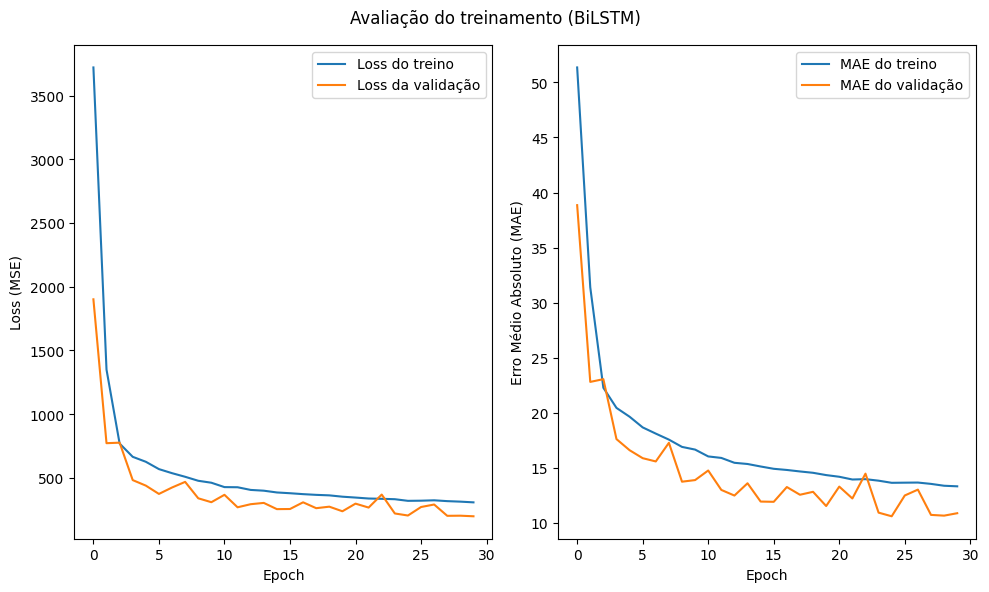

In [405]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [406]:
##Testando o modelo com os dados de teste

In [407]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [408]:
##Avaliando o modelo

259.7066030905189
16.12
0.13869014192748724
12.928495575465984
0.7377590181082272
Tempo de 150.855858s


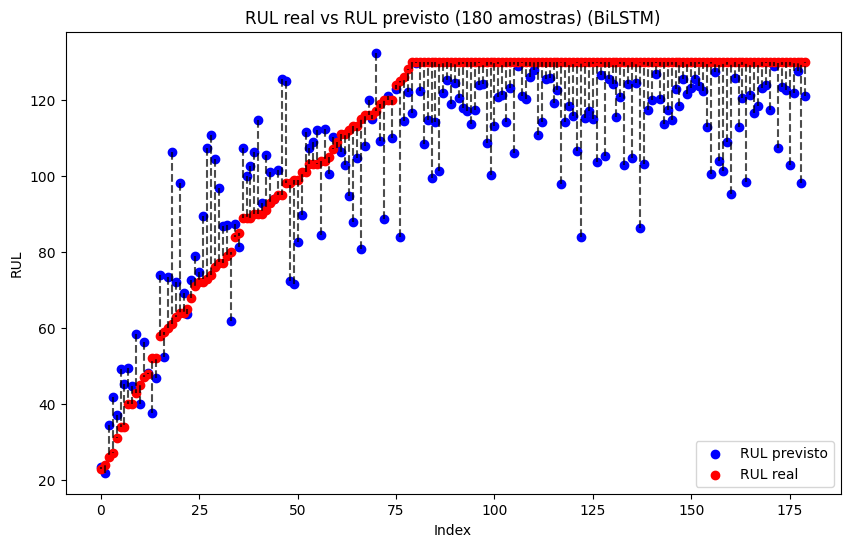

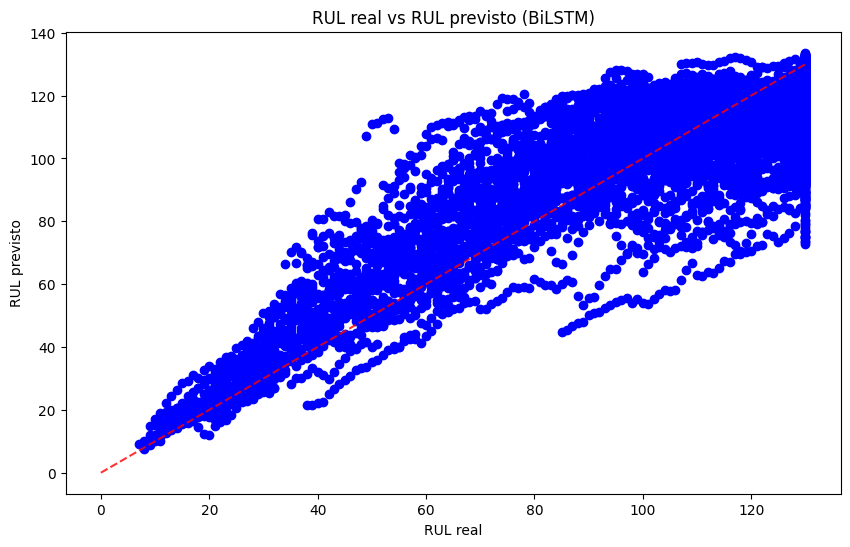

In [409]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()